In [1]:
import pandas as pd
import mediapipe as mp
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
os.getcwd()

'C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024'

In [3]:
path='C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\CP-LFW\\images\\images'

In [4]:
img_paths=[]
cnt=0
for img_path in os.scandir(path):
    img_paths.append(img_path.path)

In [5]:
mp_face_detector=mp.solutions.face_detection
mp_draw_utils=mp.solutions.drawing_utils

In [6]:
def face_detector(path):
    img=cv2.imread(path)
    rgb_img=None
    if img is not None:
        rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    else:
        return None
    with mp_face_detector.FaceDetection(model_selection=1,min_detection_confidence=0.5) as face_detector:
        result=face_detector.process(rgb_img)
        landmarks=[]
        if result.detections != None:
            roi_img=None
            for detection in result.detections:
                box=detection.location_data.relative_bounding_box
                x_start,y_start=int(box.xmin*img.shape[1]),int(box.ymin*img.shape[0])
                x_end,y_end=int((box.xmin+box.width)*img.shape[1]),int((box.ymin+box.height)*img.shape[0])
                Nose=mp_face_detector.get_key_point(detection,mp_face_detector.FaceKeyPoint.NOSE_TIP)
                mouth=mp_face_detector.get_key_point(detection,mp_face_detector.FaceKeyPoint.MOUTH_CENTER)
                right_eye=mp_face_detector.get_key_point(detection,mp_face_detector.FaceKeyPoint.RIGHT_EYE)
                left_eye=mp_face_detector.get_key_point(detection,mp_face_detector.FaceKeyPoint.LEFT_EYE)
                right_ear=mp_face_detector.get_key_point(detection,mp_face_detector.FaceKeyPoint.RIGHT_EAR_TRAGION)
                left_ear=mp_face_detector.get_key_point(detection,mp_face_detector.FaceKeyPoint.LEFT_EAR_TRAGION)
                landmarks.append((Nose,mouth,right_eye,left_eye,right_ear,left_ear))
                roi_img=img[y_start:y_end,x_start:x_end]
                extracted_landmarks=[]
                for landmark in landmarks[0]:
                    extracted_landmarks.append((landmark.x,landmark.y))
            return (roi_img,extracted_landmarks)
        else:
            print('no face detected.......!')
            return None
            

In [7]:
result=face_detector(img_paths[1])

C:\Users\MAHIREDDY\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [8]:
result

(array([[[ 70,  64,  53],
         [ 77,  71,  60],
         [ 83,  74,  64],
         ...,
         [ 74,  73,  82],
         [ 79,  77,  83],
         [ 80,  78,  84]],
 
        [[ 60,  54,  43],
         [ 68,  62,  51],
         [ 79,  70,  60],
         ...,
         [ 72,  72,  78],
         [ 76,  74,  80],
         [ 73,  72,  76]],
 
        [[ 54,  48,  37],
         [ 62,  56,  45],
         [ 71,  62,  52],
         ...,
         [ 70,  70,  76],
         [ 69,  67,  73],
         [ 62,  61,  65]],
 
        ...,
 
        [[ 46,  33,  11],
         [ 51,  37,  18],
         [ 47,  33,  15],
         ...,
         [103, 103, 119],
         [104, 104, 120],
         [103, 106, 121]],
 
        [[ 43,  32,  12],
         [ 46,  35,  15],
         [ 46,  33,  17],
         ...,
         [102, 102, 118],
         [101, 104, 119],
         [102, 105, 120]],
 
        [[ 42,  31,  11],
         [ 42,  31,  11],
         [ 46,  33,  17],
         ...,
         [101, 101, 119],
  

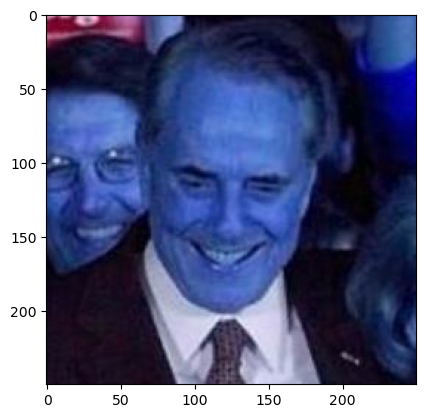

In [9]:
plt.imshow(cv2.imread(r'C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\images\Bob_Dole_1.jpg'))

# prepare dataset

In [10]:
def prepare_datset_paths(path):
    paths=[]
    labels=[]
    for img in os.scandir(path):
        paths.append(img.path)
        labels.append(img.path.split('\\')[-1].split('.')[0])
    return img_paths,labels

In [11]:
paths,labels=prepare_datset_paths(path)

In [12]:
len(paths)

11652

In [13]:
len(labels)

11652

In [14]:
cropped_faces_path='C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\CP-LFW\\images\\croped_face_images'

In [15]:
def prepare_cropped_faces(new_folder_path,paths_list,labels_list):
    cropped_img_paths=[]
    face_detected_labels=[]
    ## create a folder for store cropped faces
    if not os.path.exists(new_folder_path):
        os.makedirs(new_folder_path)
        print(f"Folder '{new_folder_path}' created.")
    else:
        print(f"Folder '{new_folder_path}' already exists.")
    ## landmarks dictionary
    landmarks_dict={'Nose_x':[],'Nose_y':[],'Mouth_x':[],'Mouth_y':[],'Right_eye_x':[],'Right_eye_y':[],'Left_eye_x':[],'Left_eye_y':[],'Right_ear_x':[],'Right_ear_y':[],'Left_ear_x':[],'Left_ear_y':[]}
    keys=['Nose_','Mouth_','Right_eye_','Left_eye_','Right_ear_','Left_ear_']
    ##iterate through image paths and generate roi images
    for index,img_path in enumerate(paths_list):
        result=face_detector(img_path)
        if result!=None:
            if np.any(result[0]) and np.any(result[1]):
                roi,landmarks=face_detector(img_path)
                for i,key in enumerate(keys):
                    landmarks_dict[key+'x'].append(landmarks[i][0])
                    landmarks_dict[key+'y'].append(landmarks[i][1])
                img_new_path=new_folder_path+'\\'+labels_list[index]+'.png'
                print(img_new_path)
                cropped_img_paths.append(img_new_path)
                face_detected_labels.append(labels_list[index])
                cv2.imwrite(img_new_path,roi)
            else:
                continue
        else:
            continue
            
    return landmarks_dict,cropped_img_paths,face_detected_labels  
                

In [16]:
face_landmarks,face_paths,face_labels=prepare_cropped_faces(cropped_faces_path,paths,labels)

Folder 'C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images' created.
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Aaron_Eckhart_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Aaron_Eckhart_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Aaron_Guiel_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Aaron_Peirsol_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Aaron_Peirsol_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_inte

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Adam_Mair_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Adam_Sandler_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Adam_Sandler_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Adam_Sandler_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Adam_Scott_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Adam_Scott_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Adel_Al-Jubeir

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Aitor_Gonzalez_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Aitor_Gonzalez_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ai_Sugiyama_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ai_Sugiyama_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ai_Sugiyama_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ajit_Agarkar_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ajit_Agarkar_2.png
C:\Users\MAH

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alberto_Ruiz_Gallardon_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alberto_Ruiz_Gallardon_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alberto_Sordi_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Albert_Brooks_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Albert_Brooks_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Albert_Brooks_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_interns

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alexandre_Daigle_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alexandre_Daigle_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alexandre_Vinokourov_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alexandre_Vinokourov_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alexa_Vega_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alexis_Bledel_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alina_Kabaeva_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alina_Kabaeva_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Aline_Chretien_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Aline_Chretien_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Aline_Chretien_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alisha_Richman_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Alisha_Richman_2.png
C

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Al_Leiter_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Al_Pacino_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Al_Pacino_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Al_Pacino_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Al_Sharpton_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Amanda_Beard_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Intern

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Anderson_Varejao_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Anders_Ebbeson_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Anders_Ebbeson_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Anders_Ebbeson_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Anders_Fogh_Rasmussen_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Andreas_Vinciguerra_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Andy_Garcia_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Andy_Garcia_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Andy_Griffith_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Andy_Griggs_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Andy_Griggs_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Andy_Hebb_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Annette_Lu_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Annette_Lu_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Anne_Donovan_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Anne_Donovan_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Anne_Donovan_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Anne_Krueger_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Anne_Krueger_2.png
no face detected.

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Antonio_Elias_Saca_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Antonio_Trillanes_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Antonio_Trillanes_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Antony_Leung_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Antony_Leung_2.png
no face detected.......!
no face detected.......!
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Antwun_Echols_1.png
no face dete

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Arye_Mekel_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Asa_Hutchinson_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Asa_Hutchinson_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Asa_Hutchinson_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ashanti_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ashanti_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ashanti_3.png

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Barbara_Becker_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Barbara_Bodine_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Barbara_Bodine_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Barbara_Boxer_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Barbara_Boxer_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Barbara_Brezigar_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Intern

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bela_Karolyi_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Benedita_da_Silva_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Benedita_da_Silva_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Benedita_da_Silva_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Benicio_Del_Toro_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Benicio_Del_Toro_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Benicio_D

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bernard_Giraudeau_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bernard_Giraudeau_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bernard_Kerik_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bernard_Kerik_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bernard_Kerik_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bernard_Landry_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Billy_Joel_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Billy_Rork_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Billy_Sollie_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Billy_Sollie_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bill_Belichick_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bill_Belichick_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\S

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bill_Richardson_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bill_Richardson_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bill_Sizemore_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bill_Sizemore_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bill_Stein_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bill_Walton_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_i

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bob_Menendez_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bob_Menendez_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bob_Newhart_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bob_Petrino_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bob_Petrino_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bob_Petrino_3.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Brandon_Lloyd_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Brandon_Lloyd_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Brandon_Lloyd_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Brandon_Robinson_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Brandon_Robinson_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Brandon_Robinson_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Brandon_Webb_1.pn

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bridgette_Wilson-Sampras_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bridgette_Wilson-Sampras_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bridgette_Wilson-Sampras_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Bridget_Fonda_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Brigitte_Boisselier_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Brigitte_Boisselier_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Calbert_Cheaney_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Calbert_Cheaney_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Calbert_Cheaney_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Calista_Flockhart_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Calista_Flockhart_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Calvin_Harrison_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\crop

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Carlos_Iturgaitz_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Carlos_Iturgaitz_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Carlos_Menem_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Carlos_Menem_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Carlos_Menem_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Carlos_Mesa_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\i

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Casey_Mears_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Cass_Ballenger_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Cass_Ballenger_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Cate_Blanchett_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Cate_Blanchett_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Catherine_Bell_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Chandrika_Kumaratunga_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Chandrika_Kumaratunga_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Chang_Dae_Whan_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Chang_Dae_Whan_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Chang_Dae_Whan_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Chang_Tso_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\crope

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Charlotte_Casiraghi_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Charlotte_Casiraghi_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Charlotte_Church_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Charlotte_Church_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Charlotte_Church_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Charlotte_Rampling_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Christian_Bale_3.png
no face detected.......!
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Christian_Lacroix_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Christian_Longo_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Christian_Longo_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Christian_Longo_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Christian_Malcolm_1.png
no face 

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Chris_Dodd_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Chris_Dodd_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Chris_Gratton_1.png
no face detected.......!
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Chris_Klein_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Chris_Kolanas_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\C

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Clare_Latimer_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Clare_Latimer_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Clare_Short_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Clare_Short_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Clare_Short_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Clark_Randt_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Clark_Ran

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Collis_Temple_III_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Collis_Temple_III_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Collis_Temple_III_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Columba_Bush_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Columba_Bush_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Columba_Bush_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Compay_Segundo_1.

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Crandall_Bowles_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Crandall_Bowles_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Crispin_Glover_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Crispin_Glover_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Cristiano_da_Matta_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Cristiano_da_Matta_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desk

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Daniela_Hantuchova_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Daniele_Hypolito_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Daniele_Hypolito_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Daniele_Nardello_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Daniele_Nardello_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Danielle_Spencer_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dan_Ackroyd_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dan_Bartlett_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dan_Bartlett_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dan_Bartlett_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dan_Bylsma_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dan_Bylsma_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dan_Bylsma_3.png
C:\Users\MAHIREDDY\O

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Darryl_Stingley_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Darryl_Stingley_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Darvis_Patton_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Darvis_Patton_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Daryl_Hannah_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Daryl_Hannah_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_researc

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\David_Caruso_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\David_Caruso_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\David_Chase_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\David_Chase_3.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\David_Collenette_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\David_Coulthard_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_i

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\David_Shayler_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\David_Spade_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\David_Spade_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\David_Stern_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\David_Stern_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\David_Suazo_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship

no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dennis_Archer_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dennis_Erickson_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dennis_Franchione_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dennis_Johnson_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dennis_Johnson_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internshi

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Diane_Green_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Diane_Lane_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dianne_Feinstein_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dianne_Feinstein_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dianne_Reeves_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dianne_Reeves_3.png
C:\Users\MAHIREDDY\One

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Djabir_Said-Guerni_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Doc_Rivers_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Doc_Rivers_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Doc_Rivers_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dolly_Parton_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dolly_Parton_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dolma_T

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Don_King_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Don_Matthews_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Don_Matthews_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Don_Meredith_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Don_Meredith_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Don_Nickles_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dunn_Lampton_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dustin_Hoffman_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Dusty_Baker_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Du_Qinglin_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Du_Qinglin_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Du_Qinglin_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_su

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Edward_Arsenault_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Edward_Arsenault_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Edward_Arsenault_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Edward_Burns_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Edward_Burns_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Edward_Burns_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Edward_Egan_1.png
no

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Elena_Dementieva_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Elena_Likhovtseva_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Elena_Likhovtseva_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Elena_Likhovtseva_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Elgin_Baylor_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Elgin_Baylor_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ellen_MacArthur_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ellen_MacArthur_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ellen_MacArthur_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ellen_Pompeo_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ellen_Pompeo_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ellen_Pompeo_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Elliott_Mincberg_1.png


no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Emmy_Rossum_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Emmy_Rossum_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Emmy_Rossum_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Emyr_Jones_Parry_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Emyr_Jones_Parry_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Emyr_Jones_Parry_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_image

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Eriko_Tamura_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Erik_Morales_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Erik_Morales_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Erik_Vendt_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Erik_Vendt_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Erin_Brockovich_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\cr

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Evan_Marriott_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Evan_Marriott_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Evan_Rachel_Wood_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Evan_Rachel_Wood_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Evan_Rachel_Wood_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Eva_Amurri_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_im

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Felicity_Huffman_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Felicity_Huffman_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Felipe_De_Borbon_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Felipe_De_Borbon_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Felipe_Perez_Roque_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Felipe_Perez_Roque_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\image

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Francisco_Garcia_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Francisco_Maturana_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Francisco_Maturana_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Francisco_Maturana_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Francisco_Santos_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Francisco_Santos_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Franz_Beckenbauer_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Franz_Beckenbauer_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Franz_Fischler_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Franz_Fischler_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Franz_Muentefering_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Franz_Muentefering_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_inter

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gary_Condit_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gary_Dellaverson_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gary_Doer_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gary_Forsee_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gary_Forsee_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gary_Forsee_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\George_Allen_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\George_Allen_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\George_Blaney_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\George_Blaney_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\George_Blaney_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\George_Bovell_1.png
no face detected.......!
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_20

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gerard_Depardieu_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gerard_Depardieu_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gerard_de_Cortanze_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gerard_de_Cortanze_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gerard_de_Cortanze_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gerhard_Boekel_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gerh

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gisele_Bundchen_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gisele_Bundchen_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Giselle_Estefania_Tavarelli_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Giselle_Estefania_Tavarelli_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Giselle_Estefania_Tavarelli_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Giulietta_Masina_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDr

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gordon_Lightfoot_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gore_Verbinski_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gore_Verbinski_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Gore_Vidal_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Grace_Kelly_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Grace_Kelly_3.png


C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Guillermo_Coria_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Guillermo_Coria_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Guillermo_Ortiz_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Guillermo_Ortiz_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Guillermo_Ortiz_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Guillermo_Ruiz_Polanco_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Guiller

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hamzah_Haz_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hanan_Ashrawi_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hanan_Ashrawi_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hanan_Ashrawi_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hana_Makhmalbaf_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hana_Makhmalbaf_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\i

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hashim_Thaci_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hassanal_Bolkiah_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hassanal_Bolkiah_3.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hassan_Nasrallah_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hayden_Panettiere_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hayden_Panettiere_3.png
C:\User

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Herb_Brooks_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Herb_Brooks_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Herb_Dhaliwal_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Herb_Dhaliwal_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Herb_Sendek_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Herb_Sendek_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Horace_Newcomb_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Horace_Newcomb_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Horst_Koehler_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Horst_Koehler_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hosni_Mubarak_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Hosni_Mubarak_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ian_Gillan_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ian_Huntley_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ian_Huntley_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ian_Huntley_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ian_McKellen_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ian_McKellen_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ian_Moran_1.

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ion_Iliescu_3.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ion_Tiriac_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ira_Einhorn_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Irene_Kahn_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Irene_Kahn_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Irina_Lobacheva_1.png
C:\Users\MAHIREDDY\OneDrive\Deskto

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jaap_de_Hoop_Scheffer_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jaap_de_Hoop_Scheffer_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jackie_Chan_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jackie_Chan_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jackie_Chan_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jackie_Sherrill_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summ

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jake_Plummer_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jake_Plummer_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jakob_Kellenberger_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jalal_Talabani_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jalen_Rose_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jalen_Rose_2.png
C:\Users\MAHIREDDY\OneDri

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\James_McGreevey_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\James_Meeks_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\James_Meredeth_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\James_Murdoch_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\James_Murdoch_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\James_Spalding_1.png
C:\Users\MAHIREDDY\On

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jane_Menelaus_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jane_Menelaus_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jane_Pauley_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jane_Pauley_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jane_Walker_Wood_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jane_Walker_Wood_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_researc

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jason_Petty_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jason_Priestley_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jason_Priestley_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jason_Priestley_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jason_Sehorn_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jason_Sehorn_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jason_Sehorn_3.png
C:\Us

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jean-David_Levitte_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jean-Francois_Pontal_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jean-Francois_Pontal_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jean-Francois_Pontal_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jean-Luc_Bideau_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jean-Luc_Bideau_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_rese

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jeff_George_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jeff_George_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jeff_Hornacek_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jeff_Hornacek_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jeff_Hornacek_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jeff_Schiffner_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\image

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jeremy_Wotherspoon_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jeri_Ryan_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jeri_Ryan_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jerome_Golmard_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jerome_Golmard_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jerry_Angelo_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_in

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jia_Qinglin_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jia_Qinglin_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jimmy_Carter_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jimmy_Carter_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jimmy_Carter_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jimmy_Gobble_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\cro

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jim_Talent_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jim_Talent_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jim_Talent_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jim_Taylor_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jim_Taylor_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jim_Taylor_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jim_Thome_1.png
no 

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joey_Harrington_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joey_Mantia_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joe_Calzaghe_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joe_Carnahan_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joe_Carnahan_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joe_Cocker_1.png
no f

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Johnny_Depp_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Johnny_Depp_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Johnny_Hallyday_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Johnny_Hallyday_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Johnny_Tapia_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Johnny_Tapia_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\imag

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Geoghan_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Geoghan_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Goold_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Goold_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Goold_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Gordnick_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Gordnic

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Paul_DeJoria_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Paul_II_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Paul_II_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Philip_Elkann_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Philip_Elkann_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Philip_Elkann_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\cro

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Tyson_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Tyson_3.png
no face detected.......!
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Walsh_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Walsh_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Walsh_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\John_Warner_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Inte

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joseph_Fiennes_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joseph_Galante_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joseph_Ganim_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joseph_Ganim_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joseph_Ganim_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joseph_Kabila_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\ima

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Josh_Childress_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Josh_Childress_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Josh_Childress_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Josh_Kronfeld_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Josh_Kronfeld_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Joy_Bryant_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\im

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Juergen_Schrempp_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Juergen_Schrempp_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Juergen_Schrempp_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Juergen_Trittin_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Juergen_Trittin_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Jules_Asner_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_202

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Junichi_Inamoto_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Junichi_Inamoto_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Junko_Tabei_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Junko_Tabei_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Justine_Henin_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Justine_Pasek_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Katerina_Smrzova_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kate_Burton_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kate_Burton_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kate_Burton_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kate_Capshaw_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kate_Capshaw_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kate_C

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Keanu_Reeves_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Keanu_Reeves_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Keiko_Sofia_Fujimori_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Keira_Knightley_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Keira_Knightley_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Keira_Knightley_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summe

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ken_Dorsey_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ken_Dorsey_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ken_Kutaragi_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ken_Kutaragi_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ken_Macha_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ken_Watanabe_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_20

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\King_Abdullah_II_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\King_Abdullah_II_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\King_Abdullah_II_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\King_Bhumibol_Adulyadej_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\King_Bhumibol_Adulyadej_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kirby_Puckett_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internsh

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kurt_Busch_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kurt_Russell_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kurt_Russell_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kurt_Schottenheimer_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kurt_Schottenheimer_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Kurt_Suzuki_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-L

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Larry_Hagman_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Larry_Hagman_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Larry_Harris_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Larry_Harris_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Larry_Harris_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Larry_Johnson_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Larry_

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lawrence_MacAulay_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lawrence_MacAulay_3.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lawrence_Roberts_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Leah_Remini_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Leah_Remini_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Leander_Paes_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_res

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lenny_Wilkens_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Len_Jenoff_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Len_Jenoff_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Len_Jenoff_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Leonardo_Del_Vecchio_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Leonardo_Del_Vecchio_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_ima

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lina_Krasnoroutskaya_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lina_Krasnoroutskaya_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lina_Krasnoroutskaya_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lincoln_Chafee_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lincoln_Chafee_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lincoln_Chafee_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\ima

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lisa_Raymond_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lisa_Raymond_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lisa_Stansfield_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Liu_Xiaoqing_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Liu_Xiaoqing_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Liu_Xiaoqing_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_int

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lou_Ye_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lubomir_Zaoralek_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lubomir_Zaoralek_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Luca_Cordero_di_Montezemolo_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Luca_Cordero_di_Montezemolo_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Luciano_Bovicelli_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Intern

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lyle_Lovett_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lyle_Lovett_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lyle_Lovett_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lyle_Vanclief_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lynne_Cheney_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Lynne_Cheney_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Manuel_Llorente_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Manuel_Pellegrini_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Manuel_Pellegrini_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Manuel_Pellegrini_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Manuel_Poggiali_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Manuel_Poggiali_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Manuel_P

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mariah_Carey_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mariah_Carey_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mariah_Carey_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mariam_Ali_Hassan_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mariam_Ali_Hassan_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mariana_Ohata_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_ima

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Marion_Barry_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mario_Austin_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mario_Austin_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mario_Austin_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mario_Cipollini_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mario_Dominguez_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mark_Kelly_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mark_Leno_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mark_Leno_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mark_Mariscal_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mark_Mariscal_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mark_Martin_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summ

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Martha_Lucia_Ramirez_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Martha_Lucia_Ramirez_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Martha_Lucia_Ramirez_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Martha_Sahagun_de_Fox_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Martha_Sahagun_de_Fox_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Martha_Stewart_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Marwan_Muasher_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Marwan_Muasher_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Maryn_McKenna_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Maryn_McKenna_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mary_Blige_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mary_Bono_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_inter

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Matthew_McConaughey_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Matthew_McConaughey_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Matthew_Ouimet_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Matthew_Perry_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Matthew_Perry_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Matthias_Sammer_1.png
C:\Users

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Meg_Wakeman_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mehdi_Baala_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mehdi_Baala_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mehmet_Ali_Sahin_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mehmet_Ali_Sahin_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mehmet_Okur_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_in

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Bloomberg_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Bloomberg_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Bolton_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Bolton_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Bolton_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Brandon_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Brand

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Leavitt_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Leavitt_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Linscott_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Linscott_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Michele_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Michele_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michael_Mich

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michel_Temer_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michel_Therrien_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Michel_Therrien_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mickey_Gilley_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mickey_Loomis_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mickey_Loomis_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_resear

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mike_Krzyzewski_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mike_Krzyzewski_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mike_Krzyzewski_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mike_Leach_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mike_Leach_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mike_Leach_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mike

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Milan_Kucan_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Milan_Milutinovic_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Milan_Milutinovic_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mile_Mrksic_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mile_Mrksic_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Millicent_Martin_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_rese

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mladen_Naletilic_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Moby_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Moby_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Moby_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mohamed_Benaissa_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Mohamed_Benaissa_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_i

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Moon-So-ri_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Moon-So-ri_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Moon-So-ri_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Morgan_Fairchild_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Morgan_Fairchild_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Morgan_Freeman_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_in

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nancy_Reagan_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nancy_Reagan_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nancy_Sinatra_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nancy_Sinatra_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nanni_Moretti_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nan_Wang_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SS

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nathalie_Dechy_3.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nathan_Doudney_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nathan_Powell_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nathan_Powell_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nawabzada_Nasrullah_Khan_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nawabzada_Nasrullah_Khan_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDr

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nick_Rimando_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nick_Rimando_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nicolas_Cage_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nicolas_Cage_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nicolas_Cage_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nicolas_Escude_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Nobuyuki_Idei_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Noelle_Bush_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Noelle_Bush_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Noel_Forgeard_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Noel_Forgeard_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Noel_Niell_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SS

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Oliver_Stone_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Olivia_Newton-John_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Olivier_Boulay_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Olivier_Rochus_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Olivier_Rochus_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Olivier_Rochus_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Inte

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Oxana_Fedorova_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Oxana_Fedorova_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Oxana_Fedorova_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ozzie_Smith_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ozzy_Osbourne_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ozzy_Osbourne_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research

no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Patrick_Ewing_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Patrick_Kron_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Patrick_Kron_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Patrick_Kron_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Patrick_Leahy_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Patrick_Leahy_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDriv

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Pauley_Perrette_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Pauley_Perrette_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Paulie_Ayala_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Paulie_Ayala_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Pauline_Landers_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Pauline_Landers_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_res

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Paul_McCartney_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Paul_McNulty_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Paul_McNulty_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Paul_McNulty_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Paul_Michael_Daniels_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Paul_Michael_Daniels_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Paul_Michael_D

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Penelope_Cruz_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Penelope_Cruz_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Penny_Lancaster_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Penny_Lancaster_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Percy_Gibson_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Perry_Farrell_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internshi

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Peter_Mackay_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Peter_Mackay_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Peter_Mansbridge_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Peter_Mansbridge_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Peter_Max_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Peter_Max_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Phil_Bennett_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Phil_Bennett_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Phil_Bredesen_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Phil_Bredesen_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Phil_Bredesen_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Phil_Cline_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Phil_C

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Portia_de_Rossi_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Portia_de_Rossi_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Prem_Kumar_Nair_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Prem_Kumar_Nair_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Princess_Aiko_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Princess_Caroline_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summ

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Quincy_Jones_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Quincy_Jones_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Quincy_Jones_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Quin_Snyder_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Quin_Snyder_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Qusai_Hussein_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\cr

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Randy_Dryer_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Randy_Dryer_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Randy_Dryer_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Randy_Ferbey_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Randy_Ferbey_2.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Randy_Johnson_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internsh

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ray_Morrough_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ray_Morrough_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ray_Morrough_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ray_Nagin_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ray_Nagin_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ray_Nagin_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ray_Price_1.png
C:\Users\MAHIREDDY\OneDri

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ricardo_Monasterio_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ricardo_Sanchez_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ricardo_Sanchez_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Riccardo_Muti_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Riccardo_Muti_3.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Richard_Branson_2.png
C:\Users\MAH

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rich_Brooks_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rich_Gannon_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rich_Gannon_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rich_Gannon_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ricky_Barnes_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ricky_Barnes_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ricky_Barne

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rita_Moreno_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rita_Moreno_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rita_Wilson_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rita_Wilson_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rita_Wilson_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Robbie_Coltrane_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Robbie_Co

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Robert_Kipkoech_Cheruiyot_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Robert_Kipkoech_Cheruiyot_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Robert_Kipkoech_Cheruiyot_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Robert_Kocharian_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Robert_Kocharian_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Robert_Kocharian_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rob_Schneider_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rob_Schneider_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rob_Schneider_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rocco_Buttiglione_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rocco_Buttiglione_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rodney_Dangerfield_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Roger_Winter_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Roger_Winter_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Roh_Moo-hyun_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rolandas_Paksas_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rolandas_Paksas_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rolandas_Paksas_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rosie_Perez_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rosny_Desroches_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rosny_Desroches_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rosny_Desroches_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ross_Verba_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ross_Verba_3.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_in

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Russ_Ortiz_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rustu_Recber_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Rustu_Recber_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ruth_Bader_Ginsburg_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ruth_Christofferson_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ruth_Dreifu

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Samira_Makhmalbaf_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Samira_Makhmalbaf_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sami_Al-Arian_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sami_Al-Arian_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sammy_Knight_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sammy_Knight_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sasha_Cohen_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Satnarine_Sharma_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Scott_Blum_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Scott_Blum_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Scott_Gorelick_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Scott_Gorelick_3.png
C

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sean_Patrick_Thomas_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sean_Penn_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sean_Penn_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sean_Penn_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sean_Townsend_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sean_Townsend_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sean_Townsend_3.png
C:\Users\MAH

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shane_Hmiel_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shane_Hmiel_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shane_Loux_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shane_Mosley_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shane_Mosley_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shane_Mosley_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\crope

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shinzo_Abe_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shirley_Jones_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shirley_Jones_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shobha_De_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shobha_De_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shobha_De_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Shoshana_Johnson

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Solomon_Passy_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Solomon_Passy_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sonia_Gandhi_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sonia_Gandhi_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sonia_Gandhi_3.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Sonja_Kesselschlager_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_imag

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steny_Hoyer_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steny_Hoyer_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steny_Hoyer_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Stepan_Demirchian_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Stephane_Delajoux_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Stephane_Delajoux_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Alford_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Allan_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Allan_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Austin_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Austin_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Backley_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\cr

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Wariner_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Wariner_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Wariner_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Waugh_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Waugh_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Waugh_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Steve_Z

no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Suzanne_Gaudet_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Suzanne_Gaudet_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Suzanne_Mubarak_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Suzanne_Mubarak_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Suzanne_Somers_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Suzanne_Somers_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_r

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Talisa_Bratt_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tamara_Mowry_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tamara_Mowry_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tamara_Mowry_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tamika_Catchings_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tamika_Catchings_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tamika_Catchings_3.png
C

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ted_Nolan_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ted_Nolan_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ted_Turner_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ted_Turner_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ted_Washington_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ted_Williams_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_202

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Theo_Epstein_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Theo_Epstein_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Theo_Epstein_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Theresa_Gattung_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Theresa_Gattung_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Theresa_Gattung_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Theresa_May_1.png
C:\Us

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tiffany_Limos_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tiffany_Limos_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tiger_Woods_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tiger_Woods_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Timbul_Silaen_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Timbul_Silaen_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tina_Fey_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tina_Fey_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tina_Pisnik_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tina_Pisnik_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tina_Pisnik_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tina_Sinatra_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tina_Sinatra_3.png

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tom_Craddick_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tom_Crean_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tom_Crean_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tom_Cruise_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tom_Cruise_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tom_Curley_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_i

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Toni_Jennings_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Toni_Jennings_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tono_Suratman_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tono_Suratman_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tony_Bennett_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tony_Bennett_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_in

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Troy_Polamalu_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Troy_Polamalu_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Trudi_Lacey_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tsutomu_Takebe_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tsutomu_Takebe_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Tubby_Smith_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_in

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Valerie_Harper_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Valeri_Bure_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Valeri_Bure_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Valery_Giscard_dEstaing_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Valery_Giscard_dEstaing_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Valery_Giscard_dEstaing_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Vince_Gill_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Vince_Gill_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Vince_Vaughan_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Vince_Vaughan_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Vince_Vaughan_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Vinnie_Jones_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\cr

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Ward_Cuff_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Warren_Beatty_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Warren_Beatty_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Warren_Buffett_1.png
no face detected.......!
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Warren_Granados_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Warren_Granados_3.p

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\William_McDonough_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\William_Nessen_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\William_Nessen_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\William_Nessen_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\William_Perry_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\William_Perry_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_i

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Xanana_Gusmao_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Xanana_Gusmao_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Xanana_Gusmao_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Xavier_Malisse_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Xavier_Malisse_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Xavier_Malisse_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Xiang_Huaicheng_1.png
n

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Yoriko_Kawaguchi_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Yossi_Beilin_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Yossi_Beilin_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Yukio_Hatoyama_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Yukio_Hatoyama_2.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Yuri_Fedotov_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_researc

C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Zoran_Djindjic_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Zoran_Djindjic_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Zumrati_Juma_1.png
no face detected.......!
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Zumrati_Juma_3.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Zurab_Tsereteli_1.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LFW\images\croped_face_images\Zurab_Tsereteli_2.png
C:\Users\MAHIREDDY\OneDrive\Desktop\Internships_2024\SSN_summer_research_internship_2024\CP-LF

In [17]:
len(face_paths)

8454

In [19]:
landmarks_df=pd.DataFrame(data=face_landmarks,columns=['Nose_x','Nose_y','Mouth_x','Mouth_y','Right_eye_x','Right_eye_y','Left_eye_x','Left_eye_y','Right_ear_x','Right_ear_y','Left_ear_x','Left_ear_y'])

In [20]:
landmarks_df

Nose_x    Nose_y   Mouth_x   Mouth_y  Right_eye_x  Right_eye_y  \
0     0.505371  0.589495  0.496689  0.670345     0.421834     0.446503   
1     0.415068  0.593820  0.468813  0.646013     0.406426     0.514773   
2     0.532475  0.598377  0.516098  0.697742     0.437026     0.490905   
3     0.537013  0.632283  0.543771  0.708953     0.460233     0.523726   
4     0.325317  0.604265  0.351474  0.693888     0.366139     0.508612   
...        ...       ...       ...       ...          ...          ...   
8449  0.443090  0.580386  0.454149  0.670614     0.352425     0.495083   
8450  0.629837  0.584993  0.611412  0.691323     0.470209     0.530570   
8451  0.671822  0.626600  0.635715  0.684931     0.553688     0.518736   
8452  0.559130  0.527906  0.581406  0.644824     0.425341     0.485621   
8453  0.701256  0.550131  0.687419  0.645027     0.527470     0.492027   

      Left_eye_x  Left_eye_y  Right_ear_x  Right_ear_y  Left_ear_x  Left_ear_y  
0       0.619502    0.459569     0.329745     0.453473    0.724041    0.484527  
1       0.475193    0.472429     0.461512     0.537937    0.640585    0.438936  
2       0.625830    0.510086     0.314480     0.534281    0.700329    0.584396  
3       0.629616    0.511337     0.390599     0.547429    0.733479    0.524363  
4       0.471034    0.529992     0.415615     0.552001    0.674832    0.598563  
...          ...         ...          ...          ...         ...         ...  
8449    0.522690    0.473594     0.276941     0.555243    0.624938    0.511392  
8450    0.594751    0.498174     0.264762     0.624239    0.556737    0.554247  
8451    0.676909    0.514463     0.368440     0.525211    0.637524    0.523887  
8452    0.605210    0.430027     0.322373     0.603517    0.691219    0.487609  
8453    0.651438    0.434097     0.321671     0.581830    0.602844    0.464734  

[8454 rows x 12 columns]

In [21]:
file_path='C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\CP-LFW\\images\\face_landmarks.csv'

In [22]:
landmarks_df.to_csv(file_path,index=False)

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
def return_images_array(paths):
    images=[]
    for path in paths:
        img=cv2.imread(path)
        resized_image = cv2.resize(img, (128,128))
        rgb_img=cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB)
        images.append(rgb_img)
    return images


In [42]:
x=return_images_array(face_paths)

In [25]:
face_labels=[label[:-2] for label in face_labels]

In [26]:
labels_df=pd.DataFrame(data=face_labels,columns=['person_name'])

In [27]:
labels_dummies_df=pd.get_dummies(data=labels_df,columns=['person_name'])

In [28]:
labels_dummies_df.replace({True:1,False:0},inplace=True)

In [29]:
labels_dummies_df

person_name_AJ_Cook  person_name_AJ_Lamas  person_name_Aaron_Eckhart  \
0                       0                     0                          1   
1                       0                     0                          1   
2                       0                     0                          0   
3                       0                     0                          0   
4                       0                     0                          0   
...                   ...                   ...                        ...   
8449                    0                     0                          0   
8450                    0                     0                          0   
8451                    0                     0                          0   
8452                    0                     0                          0   
8453                    0                     0                          0   

      person_name_Aaron_Guiel  person_name_Aaron_Peirsol  \
0                           0                          0   
1                           0                          0   
2                           1                          0   
3                           0                          1   
4                           0                          1   
...                       ...                        ...   
8449                        0                          0   
8450                        0                          0   
8451                        0                          0   
8452                        0                          0   
8453                        0                          0   

      person_name_Aaron_Pena  person_name_Aaron_Sorkin  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   
...                      ...                       ...   
8449                       0                         0   
8450                       0                         0   
8451                       0                         0   
8452                       0                         0   
8453                       0                         0   

      person_name_Aaron_Tippin  person_name_Abba_Eban  \
0                            0                      0   
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                            0                      0   
...                        ...                    ...   
8449                         0                      0   
8450                         0                      0   
8451                         0                      0   
8452                         0                      0   
8453                         0                      0   

      person_name_Abbas_Kiarostami  ...  person_name_Zhong_Nanshan  \
0                                0  ...                          0   
1                                0  ...                          0   
2                                0  ...                          0   
3                                0  ...                          0   
4                                0  ...                          0   
...                            ...  ...                        ...   
8449                             0  ...                          0   
8450                             0  ...                          0   
8451                             0  ...                          0   
8452                             0  ...                          0   
8453                             0  ...                          0   

      person_name_Zhu_Rongji  person_name_Zinedine_Zidane  \
0                          0                            0   
1  

In [32]:
output_labels=list(labels_df['person_name'].unique())

In [33]:
output_labels_dict={i:name for i,name in enumerate(output_labels)}

In [35]:
labels_dummies_path='C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\CP-LFW\\images\\output_labels_dummies.csv'

In [36]:
labels_dummies_df.to_csv(labels_dummies_path,index=False)

In [37]:
data={
    'output_names':output_labels_dict
}

In [38]:
import json

In [41]:
with open('C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\CP-LFW\\images\\output_names.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

In [45]:
data1={
    'images':x
}

In [46]:
with open('C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\CP-LFW\\images\\x_data.json', 'w') as json_file:
    json.dump(data1, json_file, indent=4)

In [11]:
cropped_path='C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\CP-LFW\\images\\croped_face_images'

In [13]:
cropped_images=[]
labels=[]
for path in os.scandir(cropped_path):
    img_path=path.path
    
    label=img_path.split('\\')[-1].split('.')[0][:-2]
    labels.append(label)
    
    img=cv2.imread(img_path)
    
    resized_image = cv2.resize(img, (128,128))
    
    rgb_img=cv2.cvtColor(resized_image,cv2.COLOR_BGR2RGB)
    
    cropped_images.append(rgb_img)
    

In [14]:
cropped_images

[array([[[  3,   3,   1],
         [  2,   3,   0],
         [  6,   5,   0],
         ...,
         [ 32,  28,  19],
         [ 34,  30,  21],
         [ 32,  27,  21]],
 
        [[  4,   3,   1],
         [  4,   3,   0],
         [  9,   6,   1],
         ...,
         [ 31,  27,  18],
         [ 34,  30,  21],
         [ 33,  28,  22]],
 
        [[  5,   4,   0],
         [  6,   5,   0],
         [ 12,   9,   2],
         ...,
         [ 32,  28,  19],
         [ 35,  31,  22],
         [ 34,  29,  23]],
 
        ...,
 
        [[156, 166, 191],
         [157, 167, 192],
         [157, 169, 193],
         ...,
         [ 71,  78,  88],
         [ 69,  78,  87],
         [ 73,  81,  92]],
 
        [[157, 169, 195],
         [158, 170, 196],
         [156, 168, 192],
         ...,
         [ 69,  77,  88],
         [ 73,  81,  92],
         [ 74,  82,  93]],
 
        [[154, 166, 192],
         [155, 167, 193],
         [153, 165, 189],
         ...,
         [ 65,  75,  85],
  

In [15]:
data1={
    'x_data':cropped_images
}

In [17]:
import json

In [20]:
jsosndata=json.dump(data1)

TypeError: dump() missing 1 required positional argument: 'fp'

In [18]:
with open('C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\CP-LFW\\images\\x_data.json', 'w') as json_file:
    json.dump(data1, json_file, indent=4)

TypeError: Object of type ndarray is not JSON serializable

In [22]:
labels=np.array(labels)

In [24]:
labels_df=pd.DataFrame(labels,columns=['Labels'])

In [26]:
len(labels_df['Labels'].unique())

3892

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()

In [29]:
labels_df['labels_en']=le.fit_transform(labels_df['Labels'])

In [32]:
labels_df_en=labels_df.drop(columns=['Labels'])

In [40]:
labels_df_wen=labels_df.drop(columns=['labels_en'])

In [41]:
labels_df_dict=labels_df_wen.to_dict(orient='list')
labels_df_en_dict=labels_df_en.to_dict(orient='list')

In [43]:
data3={
    'labels_df':labels_df_dict,
    'labels_df_en':labels_df_en_dict
}

In [44]:
with open('C:\\Users\\MAHIREDDY\\OneDrive\\Desktop\\Internships_2024\\SSN_summer_research_internship_2024\\CP-LFW\\images\\labels_data.json', 'w') as json_file:
    json.dump(data3, json_file, indent=4)

In [45]:
cropped_images

[array([[[  3,   3,   1],
         [  2,   3,   0],
         [  6,   5,   0],
         ...,
         [ 32,  28,  19],
         [ 34,  30,  21],
         [ 32,  27,  21]],
 
        [[  4,   3,   1],
         [  4,   3,   0],
         [  9,   6,   1],
         ...,
         [ 31,  27,  18],
         [ 34,  30,  21],
         [ 33,  28,  22]],
 
        [[  5,   4,   0],
         [  6,   5,   0],
         [ 12,   9,   2],
         ...,
         [ 32,  28,  19],
         [ 35,  31,  22],
         [ 34,  29,  23]],
 
        ...,
 
        [[156, 166, 191],
         [157, 167, 192],
         [157, 169, 193],
         ...,
         [ 71,  78,  88],
         [ 69,  78,  87],
         [ 73,  81,  92]],
 
        [[157, 169, 195],
         [158, 170, 196],
         [156, 168, 192],
         ...,
         [ 69,  77,  88],
         [ 73,  81,  92],
         [ 74,  82,  93]],
 
        [[154, 166, 192],
         [155, 167, 193],
         [153, 165, 189],
         ...,
         [ 65,  75,  85],
  